In [1]:
from shapely.geometry import LineString, Point
import numpy as np
from matplotlib import pyplot as plt

from cartesian_to_frenet import get_cartesian_from_frenet, get_frenet_from_cartesian

### Create points for a polyline

In [6]:
x = np.arange(0,20*np.pi,0.1)   # start,stop,step
y = 30-30*np.cos(x/30)

### Create a shapely LineString from the points

In [7]:
linestring = LineString(np.vstack([x,y]).T)

# Simulate lane edges, only for visualization
linestring_left = linestring.parallel_offset(5, 'left')
linestring_right = linestring.parallel_offset(5, 'right')

### Simulate random points and headings 

In [8]:
points = [Point(10,15), Point(30,9), Point(55,0)]
headings = [10, 45, 39.7]
colors = ['ro', 'bo', 'go']

### Plot everything, and show (s,d,frenet_heading) for each (x,y,heading) tuple

Origin of the frenet frame is at (0,30) 

POINT (10 15)
Cartesian x: 10.0 Cartesian y: 15.0 Cartesian heading: 10
s: 16.094805783161057 d: 12.373615256721335 heading_frenet: -16.221842630238623 

POINT (30 9)
Cartesian x: 30.0 Cartesian y: 9.0 Cartesian heading: 45
s: 30.731124208803593 d: -3.70529738674756 heading_frenet: 6.458827716842862 

POINT (55 0)
Cartesian x: 55.0 Cartesian y: 0.0 Cartesian heading: 39.7
s: 42.51176072776595 d: -26.94953433171065 heading_frenet: -3.4836265163896982 



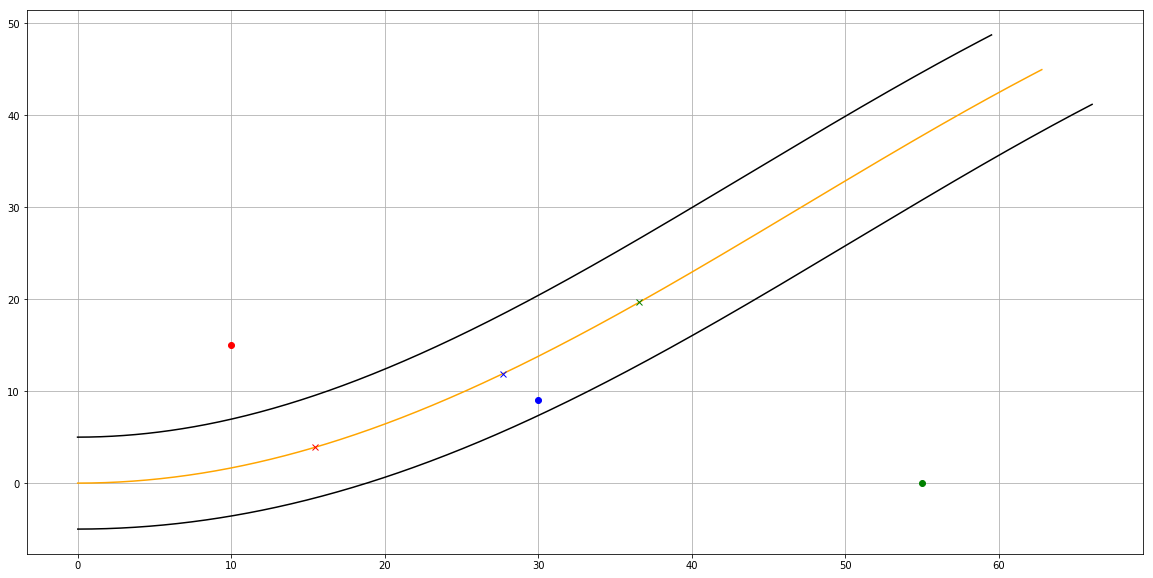

In [9]:
plt.figure(figsize = (20,10))
plt.plot(x,y,'orange')
plt.plot(np.asarray(linestring_left)[:,0],np.asarray(linestring_left)[:,1],'black')
plt.plot(np.asarray(linestring_right)[:,0],np.asarray(linestring_right)[:,1],'black')

print("Origin of the frenet frame is at (0,0) \n")
for i,point in enumerate(points):
    plt.plot(point.x, point.y, colors[i])

    
for i,point in enumerate(points):
    s,d,heading,closest_point_on_linestring = get_frenet_from_cartesian(linestring, point, headings[i])
    plt.plot(closest_point_on_linestring.x, closest_point_on_linestring.y, colors[i][:-1]+'x')

    print(point.wkt)
    print("Cartesian x:", point.x, "Cartesian y:", point.y, "Cartesian heading:", headings[i])
    print("s:", s, "d:", d, "heading_frenet:", heading,  "\n")
    
plt.grid()
plt.show()

### Project back into cartesian frame

In [8]:
frenet_s = 65.01671702978474
frenet_d = -0.9959832392170908
frenet_heading = 25.584263764960255
cartesian_x, cartesian_y, cartesian_heading = get_cartesian_from_frenet(linestring, [frenet_s, frenet_d], frenet_heading)
print("Frenet s:", frenet_s, "\nFrenet d:", frenet_d, "\nFrenet Heading:", frenet_heading, "\n")
print("Cartesian x:", cartesian_x, "\nCartesian y:", cartesian_y, "\nCartesian Heading:", cartesian_heading)

Frenet s: 65.01671702978474 
Frenet d: -0.9959832392170908 
Frenet Heading: 25.584263764960255 

Cartesian x: 55.00000000000003 
Cartesian y: 6.772360450213455e-15 
Cartesian Heading: 39.7
